In [36]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(stringr))
library(plyr)
library(ggplot2)
library(pheatmap)
library(RColorBrewer)
library(viridis)


In [40]:
save_pheatmap <- function(x, filename, width=12, height=12){
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  if(grepl(".png",filename)){
    png(filename, width=width, height=height, units = "in", res=300)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else if(grepl(".pdf",filename)){
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
  }
  else{
    print("Filename did not contain '.png' or '.pdf'")
  }}

In [37]:
df<-read.csv("06_Extrac_Mean_Expression_SF4/Up_Selected_Genes.csv",row.name=1)

In [38]:
rownames(df)<-gsub(" cell","",rownames(df))

In [47]:
Top_annotation<-as.data.frame(colnames(df))
Top_annotation$Ages<-as.numeric(gsub("X","",colnames(df)))
rownames(Top_annotation)<-colnames(df)

png 
  2

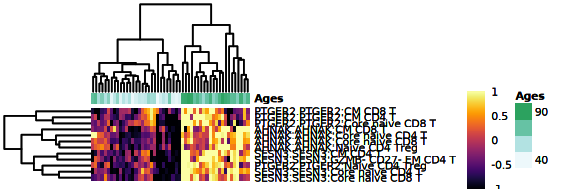

In [61]:
options(repr.plot.width = 120/25.4, repr.plot.height =  40/25.4)

breaks_sequence <- seq(-1, 1, length.out = 100)

p<-pheatmap(df, 
         breaks=breaks_sequence,
         cluster_rows=FALSE, 
         fontsize = 6,annotation=Top_annotation[2], 
         cluster_cols=FALSE,gaps_row=c(4,8),
         show_colnames=FALSE,color= inferno(100),
         border_color=NA,
         scale='row')


p
save_pheatmap(p,'FigureH.pdf', width=120/25.4, height=40/25.4)